In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/toxic_comment_train.csv.zip', compression='zip')


In [3]:
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
targets = ['toxic', 'severe_toxic', 'obscene',
'threat', 'insult', 'identity_hate']

In [6]:
df[targets].sum(axis='rows')

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [7]:
df[targets].sum(axis='rows') / len(df)

toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

In [8]:
df['bad_message'] = df[targets].any(axis='columns')
df['bad_message'].value_counts() / len(df)

False    0.898321
True     0.101679
Name: bad_message, dtype: float64

In [9]:
from keras.preprocessing.text import Tokenizer

C:\Users\venkateswarlu\PycharmProjects\FirstProject\venv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [10]:
tokenizer = Tokenizer()


In [11]:
tokenizer.fit_on_texts(df['comment_text'])


In [12]:
len(tokenizer.word_index)

210337

In [13]:
threshold = 3
vocab_size = len([el for el in tokenizer.word_counts.items() if el[1] > threshold])
vocab_size

52286

In [14]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['comment_text'])

In [15]:
sequences = np.array(tokenizer.texts_to_sequences(df['comment_text']))

In [16]:
longest_sequence = max([len(seq) for seq in sequences])
longest_sequence

1401

In [17]:
max_index = max([max(seq) for seq in sequences if len(seq) > 1])
max_index

52285

In [18]:
data = df[['bad_message']].copy()
data['seq'] = sequences

In [19]:
data.head()

,bad_message,seq
0,False,"[688, 75, 1, 126, 130, 177, 29, 672, 4511, 120..."
1,False,"[52, 2635, 13, 555, 3809, 73, 4556, 2706, 21, ..."
2,False,"[412, 437, 73, 134, 14, 249, 2, 71, 314, 78, 5..."
3,False,"[57, 7, 228, 97, 54, 328, 1436, 15, 2133, 7, 6..."
4,False,"[6, 1677, 19, 29, 3516, 54, 1069, 6, 579, 39, ..."


In [20]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data,
test_size=0.3,
random_state=0,
stratify=data['bad_message'])

In [21]:
data_train['bad_message'].value_counts() / len(data_train)

False    0.898325
True     0.101675
Name: bad_message, dtype: float64

In [22]:
data_train_good_messages = data_train[data_train['bad_message'] == False].copy()
data_train_bad_messages =data_train[data_train['bad_message'] == True].copy()
data_test_good_messages =data_test[data_test['bad_message'] == False].copy()
data_test_bad_messages =data_test[data_test['bad_message'] == True].copy()

In [23]:
from keras.preprocessing.sequence import pad_sequences
## Randomly eliminate some elements in the sequence
def random_eliminate(sequences, max_drop=6):
    seqs = []
    for sequence in sequences:
        r = range(len(sequence))
        keep = max(1, len(r) - np.random.randint(0, max_drop))
        try:
            keep_idx = sorted(np.random.choice(r, keep, replace=False))
            new_sequence = [sequence[k] for k in keep_idx]
        except:
            new_sequence = sequence
        seqs.append(new_sequence)
    return seqs

In [24]:
## Combine some good sentences and bad sentences in a batch
## and keep them roughly 50/50
def batch_generator(good_seq,bad_seq,batch_size=256,
                    random_drop=True):
    half_batch = batch_size // 2
    if half_batch > min(len(good_seq), len(bad_seq)):
        raise Exception("choose a smaller batch size")
    while True:
        good_batch = good_seq.sample(half_batch).values.copy()
        bad_batch = bad_seq.sample(half_batch).values.copy()
        
        if random_drop:
            good_batch = random_eliminate(good_batch)
            bad_batch = random_eliminate(bad_batch)
            
        combined_seq = np.hstack([good_batch, bad_batch])
        X = pad_sequences(combined_seq)
        y = half_batch * [False] + half_batch * [True]
        
        yield (X, y)

In [25]:
batch_size = 256
train_gen = batch_generator(data_train_good_messages['seq'],
data_train_bad_messages['seq'],
batch_size=batch_size)

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, GRU
from keras.optimizers import Adam

In [27]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16))
model.add(GRU(32, dropout=0.15, recurrent_dropout=0.15))
model.add(Dense(1, activation='sigmoid'))
model.compile(
optimizer=Adam(lr=0.01),
loss='binary_crossentropy',
metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          836576    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                4704      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 841,313
Trainable params: 841,313
Non-trainable params: 0
_________________________________________________________________


In [28]:
for X_val, y_val in batch_generator(
    data_test_good_messages['seq'],
    data_test_bad_messages['seq'],
    batch_size=1024,
    random_drop=False):
    break

In [29]:
h = model.fit_generator(train_gen,
steps_per_epoch=len(data_train_bad_messages) / batch_size,
epochs=10,
verbose=1,
validation_data=(X_val, y_val))

Epoch 1/10


 1/44 [..............................] - ETA: 9:15 - loss: 0.6934 - acc: 0.5078

 2/44 [>.............................] - ETA: 6:09 - loss: 0.6925 - acc: 0.5312

 3/44 [=>............................] - ETA: 4:24 - loss: 0.6915 - acc: 0.5638

 4/44 [=>............................] - ETA: 3:32 - loss: 0.6904 - acc: 0.5830

 5/44 [==>...........................] - ETA: 3:03 - loss: 0.6893 - acc: 0.5898

 6/44 [===>..........................] - ETA: 2:41 - loss: 0.6870 - acc: 0.5977

 7/44 [===>..........................] - ETA: 2:24 - loss: 0.6829 - acc: 0.6150

 8/44 [====>.........................] - ETA: 2:16 - loss: 0.6772 - acc: 0.6323

 9/44 [=====>........................] - ETA: 2:06 - loss: 0.6704 - acc: 0.6467

10/44 [=====>........................] - ETA: 1:56 - loss: 0.6618 - acc: 0.6562

11/44 [======>.......................] - ETA: 1:48 - loss: 0.6476 - acc: 0.6694

12/44 [=======>......................] - ETA: 1:42 - loss: 0.6388 - acc: 0.6764

13/44 [=======>......................] - ETA: 1:35 - loss: 0.6295 - acc: 0.6815

14/44 [========>.....................] - ETA: 1:30 - loss: 0.6196 - acc: 0.6872

15/44 [=========>....................] - ETA: 1:27 - loss: 0.6129 - acc: 0.6904

16/44 [=========>....................] - ETA: 1:23 - loss: 0.6042 - acc: 0.6941

17/44 [==========>...................] - ETA: 1:18 - loss: 0.5952 - acc: 0.6985

18/44 [===========>..................] - ETA: 1:16 - loss: 0.5886 - acc: 0.7031

19/44 [===========>..................] - ETA: 1:13 - loss: 0.5817 - acc: 0.7074

20/44 [============>.................] - ETA: 1:09 - loss: 0.5760 - acc: 0.7113

21/44 [=============>................] - ETA: 1:05 - loss: 0.5727 - acc: 0.7134

22/44 [=============>................] - ETA: 1:01 - loss: 0.5659 - acc: 0.7177

23/44 [==============>...............] - ETA: 1:00 - loss: 0.5584 - acc: 0.7227

24/44 [===============>..............] - ETA: 56s - loss: 0.5546 - acc: 0.7253 

25/44 [===============>..............] - ETA: 53s - loss: 0.5494 - acc: 0.7281

26/44 [================>.............] - ETA: 50s - loss: 0.5482 - acc: 0.7285

27/44 [=================>............] - ETA: 47s - loss: 0.5444 - acc: 0.7305

28/44 [=================>............] - ETA: 44s - loss: 0.5385 - acc: 0.7345

29/44 [==================>...........] - ETA: 42s - loss: 0.5348 - acc: 0.7372

30/44 [===================>..........] - ETA: 39s - loss: 0.5301 - acc: 0.7393

31/44 [===================>..........] - ETA: 36s - loss: 0.5256 - acc: 0.7422

32/44 [====================>.........] - ETA: 33s - loss: 0.5217 - acc: 0.7452

33/44 [=====================>........] - ETA: 30s - loss: 0.5168 - acc: 0.7485

34/44 [=====================>........] - ETA: 27s - loss: 0.5118 - acc: 0.7515

35/44 [======================>.......] - ETA: 24s - loss: 0.5067 - acc: 0.7542

36/44 [=======================>......] - ETA: 22s - loss: 0.5016 - acc: 0.7575

37/44 [========================>.....] - ETA: 19s - loss: 0.4972 - acc: 0.7603

38/44 [========================>.....] - ETA: 16s - loss: 0.4945 - acc: 0.7619

39/44 [=========================>....] - ETA: 13s - loss: 0.4914 - acc: 0.7641

40/44 [==========================>...] - ETA: 11s - loss: 0.4932 - acc: 0.7647

41/44 [==========================>...] - ETA: 8s - loss: 0.4890 - acc: 0.7675 

42/44 [===========================>..] - ETA: 5s - loss: 0.4873 - acc: 0.7685

43/44 [============================>.] - ETA: 3s - loss: 0.4842 - acc: 0.7707

44/44 [============================>.] - ETA: 0s - loss: 0.4827 - acc: 0.7714

45/44 [==============================] - 117s 3s/step - loss: 0.4797 - acc: 0.7735 - val_loss: 0.3829 - val_acc: 0.8213


Epoch 2/10


 1/44 [..............................] - ETA: 1:43 - loss: 0.3729 - acc: 0.8242

 2/44 [>.............................] - ETA: 1:28 - loss: 0.3994 - acc: 0.8164

 3/44 [=>............................] - ETA: 1:24 - loss: 0.3927 - acc: 0.8177

 4/44 [=>............................] - ETA: 1:23 - loss: 0.3871 - acc: 0.8242

 5/44 [==>...........................] - ETA: 1:34 - loss: 0.3821 - acc: 0.8305

 6/44 [===>..........................] - ETA: 1:27 - loss: 0.3717 - acc: 0.8379

 7/44 [===>..........................] - ETA: 1:19 - loss: 0.3738 - acc: 0.8376

 8/44 [====>.........................] - ETA: 1:13 - loss: 0.3644 - acc: 0.8428

 9/44 [=====>........................] - ETA: 1:10 - loss: 0.3597 - acc: 0.8455

10/44 [=====>........................] - ETA: 1:06 - loss: 0.3561 - acc: 0.8488

11/44 [======>.......................] - ETA: 1:04 - loss: 0.3604 - acc: 0.8473

12/44 [=======>......................] - ETA: 1:03 - loss: 0.3650 - acc: 0.8454

13/44 [=======>......................] - ETA: 1:00 - loss: 0.3664 - acc: 0.8456

14/44 [========>.....................] - ETA: 59s - loss: 0.3660 - acc: 0.8463 

15/44 [=========>....................] - ETA: 56s - loss: 0.3657 - acc: 0.8474

16/44 [=========>....................] - ETA: 54s - loss: 0.3671 - acc: 0.8472

17/44 [==========>...................] - ETA: 53s - loss: 0.3633 - acc: 0.8481

18/44 [===========>..................] - ETA: 52s - loss: 0.3603 - acc: 0.8492

19/44 [===========>..................] - ETA: 51s - loss: 0.3560 - acc: 0.8526

20/44 [============>.................] - ETA: 49s - loss: 0.3516 - acc: 0.8539

21/44 [=============>................] - ETA: 47s - loss: 0.3536 - acc: 0.8538

22/44 [=============>................] - ETA: 46s - loss: 0.3505 - acc: 0.8551

23/44 [==============>...............] - ETA: 43s - loss: 0.3471 - acc: 0.8575

24/44 [===============>..............] - ETA: 41s - loss: 0.3481 - acc: 0.8576

25/44 [===============>..............] - ETA: 40s - loss: 0.3463 - acc: 0.8584

26/44 [================>.............] - ETA: 38s - loss: 0.3440 - acc: 0.8598

27/44 [=================>............] - ETA: 36s - loss: 0.3430 - acc: 0.8607

28/44 [=================>............] - ETA: 34s - loss: 0.3405 - acc: 0.8622

29/44 [==================>...........] - ETA: 32s - loss: 0.3383 - acc: 0.8633

30/44 [===================>..........] - ETA: 30s - loss: 0.3365 - acc: 0.8643

31/44 [===================>..........] - ETA: 28s - loss: 0.3365 - acc: 0.8643

32/44 [====================>.........] - ETA: 26s - loss: 0.3344 - acc: 0.8649

33/44 [=====================>........] - ETA: 24s - loss: 0.3331 - acc: 0.8655

34/44 [=====================>........] - ETA: 21s - loss: 0.3328 - acc: 0.8660

35/44 [======================>.......] - ETA: 19s - loss: 0.3315 - acc: 0.8666

36/44 [=======================>......] - ETA: 17s - loss: 0.3321 - acc: 0.8663

37/44 [========================>.....] - ETA: 15s - loss: 0.3303 - acc: 0.8668

38/44 [========================>.....] - ETA: 13s - loss: 0.3295 - acc: 0.8674

39/44 [=========================>....] - ETA: 11s - loss: 0.3283 - acc: 0.8678

40/44 [==========================>...] - ETA: 9s - loss: 0.3272 - acc: 0.8680 

41/44 [==========================>...] - ETA: 7s - loss: 0.3260 - acc: 0.8686

42/44 [===========================>..] - ETA: 5s - loss: 0.3239 - acc: 0.8696

43/44 [============================>.] - ETA: 2s - loss: 0.3217 - acc: 0.8709

44/44 [============================>.] - ETA: 0s - loss: 0.3192 - acc: 0.8721

45/44 [==============================] - 99s 2s/step - loss: 0.3181 - acc: 0.8725 - val_loss: 0.2489 - val_acc: 0.9062


Epoch 3/10


 1/44 [..............................] - ETA: 1:15 - loss: 0.2474 - acc: 0.9023

 2/44 [>.............................] - ETA: 1:22 - loss: 0.2932 - acc: 0.8926

 3/44 [=>............................] - ETA: 1:22 - loss: 0.2759 - acc: 0.8932

 4/44 [=>............................] - ETA: 1:22 - loss: 0.3061 - acc: 0.8809

 5/44 [==>...........................] - ETA: 1:25 - loss: 0.2982 - acc: 0.8852

 6/44 [===>..........................] - ETA: 1:21 - loss: 0.3012 - acc: 0.8796

 7/44 [===>..........................] - ETA: 1:16 - loss: 0.2966 - acc: 0.8795

 8/44 [====>.........................] - ETA: 1:12 - loss: 0.2928 - acc: 0.8818

 9/44 [=====>........................] - ETA: 1:10 - loss: 0.2861 - acc: 0.8845

10/44 [=====>........................] - ETA: 1:08 - loss: 0.2849 - acc: 0.8848

11/44 [======>.......................] - ETA: 1:05 - loss: 0.2854 - acc: 0.8846

12/44 [=======>......................] - ETA: 1:04 - loss: 0.2910 - acc: 0.8822

13/44 [=======>......................] - ETA: 1:04 - loss: 0.2874 - acc: 0.8840

14/44 [========>.....................] - ETA: 1:02 - loss: 0.2878 - acc: 0.8825

15/44 [=========>....................] - ETA: 58s - loss: 0.2865 - acc: 0.8831 

16/44 [=========>....................] - ETA: 58s - loss: 0.2862 - acc: 0.8833

17/44 [==========>...................] - ETA: 55s - loss: 0.2856 - acc: 0.8835

18/44 [===========>..................] - ETA: 54s - loss: 0.2847 - acc: 0.8841

19/44 [===========>..................] - ETA: 52s - loss: 0.2831 - acc: 0.8838

20/44 [============>.................] - ETA: 50s - loss: 0.2817 - acc: 0.8842

21/44 [=============>................] - ETA: 49s - loss: 0.2817 - acc: 0.8843

22/44 [=============>................] - ETA: 47s - loss: 0.2797 - acc: 0.8846

23/44 [==============>...............] - ETA: 44s - loss: 0.2784 - acc: 0.8849

24/44 [===============>..............] - ETA: 43s - loss: 0.2750 - acc: 0.8874

25/44 [===============>..............] - ETA: 40s - loss: 0.2718 - acc: 0.8886

26/44 [================>.............] - ETA: 39s - loss: 0.2728 - acc: 0.8887

27/44 [=================>............] - ETA: 37s - loss: 0.2731 - acc: 0.8893

28/44 [=================>............] - ETA: 35s - loss: 0.2756 - acc: 0.8892

29/44 [==================>...........] - ETA: 33s - loss: 0.2731 - acc: 0.8910

30/44 [===================>..........] - ETA: 31s - loss: 0.2693 - acc: 0.8928

31/44 [===================>..........] - ETA: 29s - loss: 0.2684 - acc: 0.8935

32/44 [====================>.........] - ETA: 26s - loss: 0.2679 - acc: 0.8937

33/44 [=====================>........] - ETA: 24s - loss: 0.2672 - acc: 0.8938

34/44 [=====================>........] - ETA: 22s - loss: 0.2653 - acc: 0.8941

35/44 [======================>.......] - ETA: 20s - loss: 0.2648 - acc: 0.8942

36/44 [=======================>......] - ETA: 17s - loss: 0.2642 - acc: 0.8944

37/44 [========================>.....] - ETA: 15s - loss: 0.2628 - acc: 0.8952

38/44 [========================>.....] - ETA: 13s - loss: 0.2625 - acc: 0.8951

39/44 [=========================>....] - ETA: 11s - loss: 0.2622 - acc: 0.8953

40/44 [==========================>...] - ETA: 9s - loss: 0.2602 - acc: 0.8963 

41/44 [==========================>...] - ETA: 7s - loss: 0.2602 - acc: 0.8959

42/44 [===========================>..] - ETA: 5s - loss: 0.2611 - acc: 0.8954

43/44 [============================>.] - ETA: 2s - loss: 0.2619 - acc: 0.8953

44/44 [============================>.] - ETA: 0s - loss: 0.2620 - acc: 0.8952

45/44 [==============================] - 101s 2s/step - loss: 0.2618 - acc: 0.8954 - val_loss: 0.2318 - val_acc: 0.9102


Epoch 4/10


 1/44 [..............................] - ETA: 1:52 - loss: 0.2350 - acc: 0.9141

 2/44 [>.............................] - ETA: 1:42 - loss: 0.2227 - acc: 0.9141

 3/44 [=>............................] - ETA: 1:25 - loss: 0.2190 - acc: 0.9115

 4/44 [=>............................] - ETA: 1:15 - loss: 0.2357 - acc: 0.8965

 5/44 [==>...........................] - ETA: 1:17 - loss: 0.2329 - acc: 0.9008

 6/44 [===>..........................] - ETA: 1:19 - loss: 0.2510 - acc: 0.8939

 7/44 [===>..........................] - ETA: 1:20 - loss: 0.2545 - acc: 0.8929

 8/44 [====>.........................] - ETA: 1:21 - loss: 0.2543 - acc: 0.8936

 9/44 [=====>........................] - ETA: 1:20 - loss: 0.2442 - acc: 0.8971

10/44 [=====>........................] - ETA: 1:18 - loss: 0.2468 - acc: 0.8977

11/44 [======>.......................] - ETA: 1:15 - loss: 0.2458 - acc: 0.8999

12/44 [=======>......................] - ETA: 1:13 - loss: 0.2439 - acc: 0.9004

13/44 [=======>......................] - ETA: 1:11 - loss: 0.2428 - acc: 0.9008

14/44 [========>.....................] - ETA: 1:07 - loss: 0.2483 - acc: 0.8982

15/44 [=========>....................] - ETA: 1:04 - loss: 0.2460 - acc: 0.8984

16/44 [=========>....................] - ETA: 1:01 - loss: 0.2437 - acc: 0.8989

17/44 [==========>...................] - ETA: 1:00 - loss: 0.2458 - acc: 0.8971

18/44 [===========>..................] - ETA: 58s - loss: 0.2470 - acc: 0.8958 

19/44 [===========>..................] - ETA: 56s - loss: 0.2476 - acc: 0.8964

20/44 [============>.................] - ETA: 52s - loss: 0.2452 - acc: 0.8975

21/44 [=============>................] - ETA: 50s - loss: 0.2434 - acc: 0.8983

22/44 [=============>................] - ETA: 49s - loss: 0.2422 - acc: 0.8990

23/44 [==============>...............] - ETA: 47s - loss: 0.2426 - acc: 0.8993

24/44 [===============>..............] - ETA: 46s - loss: 0.2412 - acc: 0.9002

25/44 [===============>..............] - ETA: 44s - loss: 0.2419 - acc: 0.8997

26/44 [================>.............] - ETA: 42s - loss: 0.2407 - acc: 0.9004

27/44 [=================>............] - ETA: 40s - loss: 0.2392 - acc: 0.9008

28/44 [=================>............] - ETA: 38s - loss: 0.2392 - acc: 0.9008

29/44 [==================>...........] - ETA: 35s - loss: 0.2396 - acc: 0.9005

30/44 [===================>..........] - ETA: 33s - loss: 0.2374 - acc: 0.9016

31/44 [===================>..........] - ETA: 31s - loss: 0.2379 - acc: 0.9013

32/44 [====================>.........] - ETA: 29s - loss: 0.2387 - acc: 0.9009

33/44 [=====================>........] - ETA: 26s - loss: 0.2387 - acc: 0.9003

34/44 [=====================>........] - ETA: 24s - loss: 0.2383 - acc: 0.9009

35/44 [======================>.......] - ETA: 22s - loss: 0.2366 - acc: 0.9020

36/44 [=======================>......] - ETA: 20s - loss: 0.2362 - acc: 0.9025

37/44 [========================>.....] - ETA: 18s - loss: 0.2355 - acc: 0.9026

38/44 [========================>.....] - ETA: 15s - loss: 0.2356 - acc: 0.9020

39/44 [=========================>....] - ETA: 12s - loss: 0.2337 - acc: 0.9029

40/44 [==========================>...] - ETA: 10s - loss: 0.2330 - acc: 0.9032

41/44 [==========================>...] - ETA: 8s - loss: 0.2339 - acc: 0.9028 

42/44 [===========================>..] - ETA: 5s - loss: 0.2345 - acc: 0.9027

43/44 [============================>.] - ETA: 3s - loss: 0.2328 - acc: 0.9034

44/44 [============================>.] - ETA: 0s - loss: 0.2319 - acc: 0.9039

45/44 [==============================] - 110s 2s/step - loss: 0.2316 - acc: 0.9040 - val_loss: 0.2058 - val_acc: 0.9180


Epoch 5/10


 1/44 [..............................] - ETA: 1:39 - loss: 0.1466 - acc: 0.9492

 2/44 [>.............................] - ETA: 1:34 - loss: 0.2007 - acc: 0.9238

 3/44 [=>............................] - ETA: 1:29 - loss: 0.1879 - acc: 0.9323

 4/44 [=>............................] - ETA: 1:32 - loss: 0.1854 - acc: 0.9316

 5/44 [==>...........................] - ETA: 1:30 - loss: 0.1965 - acc: 0.9281

 6/44 [===>..........................] - ETA: 1:31 - loss: 0.1987 - acc: 0.9290

 7/44 [===>..........................] - ETA: 1:30 - loss: 0.1948 - acc: 0.9297

 8/44 [====>.........................] - ETA: 1:28 - loss: 0.1945 - acc: 0.9258

 9/44 [=====>........................] - ETA: 1:24 - loss: 0.1998 - acc: 0.9258

10/44 [=====>........................] - ETA: 1:24 - loss: 0.2063 - acc: 0.9211

11/44 [======>.......................] - ETA: 1:23 - loss: 0.2047 - acc: 0.9229

12/44 [=======>......................] - ETA: 1:20 - loss: 0.2029 - acc: 0.9229

13/44 [=======>......................] - ETA: 1:19 - loss: 0.2085 - acc: 0.9222

14/44 [========>.....................] - ETA: 1:16 - loss: 0.2081 - acc: 0.9213

15/44 [=========>....................] - ETA: 1:13 - loss: 0.2120 - acc: 0.9177

16/44 [=========>....................] - ETA: 1:13 - loss: 0.2130 - acc: 0.9167

17/44 [==========>...................] - ETA: 1:12 - loss: 0.2135 - acc: 0.9166

18/44 [===========>..................] - ETA: 1:09 - loss: 0.2151 - acc: 0.9156

19/44 [===========>..................] - ETA: 1:06 - loss: 0.2130 - acc: 0.9163

20/44 [============>.................] - ETA: 1:03 - loss: 0.2115 - acc: 0.9164

21/44 [=============>................] - ETA: 1:00 - loss: 0.2100 - acc: 0.9172

22/44 [=============>................] - ETA: 58s - loss: 0.2110 - acc: 0.9158 

23/44 [==============>...............] - ETA: 55s - loss: 0.2083 - acc: 0.9173

24/44 [===============>..............] - ETA: 51s - loss: 0.2081 - acc: 0.9176

25/44 [===============>..............] - ETA: 50s - loss: 0.2075 - acc: 0.9177

26/44 [================>.............] - ETA: 47s - loss: 0.2071 - acc: 0.9177

27/44 [=================>............] - ETA: 44s - loss: 0.2065 - acc: 0.9177

28/44 [=================>............] - ETA: 41s - loss: 0.2079 - acc: 0.9174

29/44 [==================>...........] - ETA: 38s - loss: 0.2104 - acc: 0.9166

30/44 [===================>..........] - ETA: 35s - loss: 0.2094 - acc: 0.9174

31/44 [===================>..........] - ETA: 33s - loss: 0.2095 - acc: 0.9172

32/44 [====================>.........] - ETA: 30s - loss: 0.2074 - acc: 0.9186

33/44 [=====================>........] - ETA: 27s - loss: 0.2070 - acc: 0.9188

34/44 [=====================>........] - ETA: 25s - loss: 0.2072 - acc: 0.9184

35/44 [======================>.......] - ETA: 23s - loss: 0.2077 - acc: 0.9180

36/44 [=======================>......] - ETA: 20s - loss: 0.2074 - acc: 0.9182

37/44 [========================>.....] - ETA: 18s - loss: 0.2084 - acc: 0.9182

38/44 [========================>.....] - ETA: 15s - loss: 0.2091 - acc: 0.9175

39/44 [=========================>....] - ETA: 13s - loss: 0.2097 - acc: 0.9171

40/44 [==========================>...] - ETA: 10s - loss: 0.2106 - acc: 0.9171

41/44 [==========================>...] - ETA: 8s - loss: 0.2102 - acc: 0.9173 

42/44 [===========================>..] - ETA: 6s - loss: 0.2093 - acc: 0.9175

43/44 [============================>.] - ETA: 3s - loss: 0.2096 - acc: 0.9176

44/44 [============================>.] - ETA: 0s - loss: 0.2098 - acc: 0.9179

45/44 [==============================] - 116s 3s/step - loss: 0.2095 - acc: 0.9179 - val_loss: 0.2088 - val_acc: 0.9180


Epoch 6/10


 1/44 [..............................] - ETA: 1:34 - loss: 0.1797 - acc: 0.9375

 2/44 [>.............................] - ETA: 1:25 - loss: 0.1688 - acc: 0.9316

 3/44 [=>............................] - ETA: 1:24 - loss: 0.1782 - acc: 0.9323

 4/44 [=>............................] - ETA: 1:24 - loss: 0.1812 - acc: 0.9277

 5/44 [==>...........................] - ETA: 1:28 - loss: 0.1931 - acc: 0.9211

 6/44 [===>..........................] - ETA: 1:24 - loss: 0.2008 - acc: 0.9160

 7/44 [===>..........................] - ETA: 1:17 - loss: 0.2026 - acc: 0.9169

 8/44 [====>.........................] - ETA: 1:19 - loss: 0.2026 - acc: 0.9175

 9/44 [=====>........................] - ETA: 1:15 - loss: 0.2023 - acc: 0.9158

10/44 [=====>........................] - ETA: 1:10 - loss: 0.2055 - acc: 0.9129

11/44 [======>.......................] - ETA: 1:09 - loss: 0.2059 - acc: 0.9134

12/44 [=======>......................] - ETA: 1:09 - loss: 0.2054 - acc: 0.9141

13/44 [=======>......................] - ETA: 1:06 - loss: 0.2078 - acc: 0.9141

14/44 [========>.....................] - ETA: 1:05 - loss: 0.2043 - acc: 0.9143

15/44 [=========>....................] - ETA: 1:02 - loss: 0.2087 - acc: 0.9125

16/44 [=========>....................] - ETA: 1:00 - loss: 0.2134 - acc: 0.9111

17/44 [==========>...................] - ETA: 1:00 - loss: 0.2144 - acc: 0.9113

18/44 [===========>..................] - ETA: 57s - loss: 0.2110 - acc: 0.9125 

19/44 [===========>..................] - ETA: 55s - loss: 0.2094 - acc: 0.9137

20/44 [============>.................] - ETA: 52s - loss: 0.2069 - acc: 0.9143

21/44 [=============>................] - ETA: 50s - loss: 0.2065 - acc: 0.9150

22/44 [=============>................] - ETA: 47s - loss: 0.2042 - acc: 0.9160

23/44 [==============>...............] - ETA: 45s - loss: 0.2028 - acc: 0.9163

24/44 [===============>..............] - ETA: 44s - loss: 0.2027 - acc: 0.9172

25/44 [===============>..............] - ETA: 42s - loss: 0.2040 - acc: 0.9167

26/44 [================>.............] - ETA: 40s - loss: 0.2035 - acc: 0.9178

27/44 [=================>............] - ETA: 38s - loss: 0.2026 - acc: 0.9181

28/44 [=================>............] - ETA: 36s - loss: 0.2017 - acc: 0.9181

29/44 [==================>...........] - ETA: 33s - loss: 0.2012 - acc: 0.9184

30/44 [===================>..........] - ETA: 32s - loss: 0.2000 - acc: 0.9191

31/44 [===================>..........] - ETA: 30s - loss: 0.1987 - acc: 0.9197

32/44 [====================>.........] - ETA: 27s - loss: 0.1982 - acc: 0.9202

33/44 [=====================>........] - ETA: 25s - loss: 0.1980 - acc: 0.9206

34/44 [=====================>........] - ETA: 23s - loss: 0.1976 - acc: 0.9205

35/44 [======================>.......] - ETA: 21s - loss: 0.1954 - acc: 0.9215

36/44 [=======================>......] - ETA: 18s - loss: 0.1951 - acc: 0.9214

37/44 [========================>.....] - ETA: 16s - loss: 0.1951 - acc: 0.9211

38/44 [========================>.....] - ETA: 14s - loss: 0.1953 - acc: 0.9211

39/44 [=========================>....] - ETA: 12s - loss: 0.1945 - acc: 0.9215

40/44 [==========================>...] - ETA: 9s - loss: 0.1942 - acc: 0.9217 

41/44 [==========================>...] - ETA: 7s - loss: 0.1936 - acc: 0.9222

42/44 [===========================>..] - ETA: 5s - loss: 0.1949 - acc: 0.9219

43/44 [============================>.] - ETA: 3s - loss: 0.1950 - acc: 0.9220

44/44 [============================>.] - ETA: 0s - loss: 0.1947 - acc: 0.9220

45/44 [==============================] - 104s 2s/step - loss: 0.1950 - acc: 0.9218 - val_loss: 0.2047 - val_acc: 0.9170


Epoch 7/10


 1/44 [..............................] - ETA: 2:41 - loss: 0.1971 - acc: 0.9023

 2/44 [>.............................] - ETA: 2:01 - loss: 0.2000 - acc: 0.9160

 3/44 [=>............................] - ETA: 1:31 - loss: 0.2042 - acc: 0.9219

 4/44 [=>............................] - ETA: 1:27 - loss: 0.2003 - acc: 0.9258

 5/44 [==>...........................] - ETA: 1:25 - loss: 0.1994 - acc: 0.9219

 6/44 [===>..........................] - ETA: 1:28 - loss: 0.1905 - acc: 0.9245

 7/44 [===>..........................] - ETA: 1:32 - loss: 0.1877 - acc: 0.9241

 8/44 [====>.........................] - ETA: 1:29 - loss: 0.1933 - acc: 0.9229

 9/44 [=====>........................] - ETA: 1:23 - loss: 0.1941 - acc: 0.9201

10/44 [=====>........................] - ETA: 1:19 - loss: 0.1930 - acc: 0.9211

11/44 [======>.......................] - ETA: 1:14 - loss: 0.1927 - acc: 0.9215

12/44 [=======>......................] - ETA: 1:13 - loss: 0.1875 - acc: 0.9242

13/44 [=======>......................] - ETA: 1:09 - loss: 0.1886 - acc: 0.9243

14/44 [========>.....................] - ETA: 1:05 - loss: 0.1867 - acc: 0.9263

15/44 [=========>....................] - ETA: 1:03 - loss: 0.1866 - acc: 0.9268

16/44 [=========>....................] - ETA: 1:00 - loss: 0.1897 - acc: 0.9258

17/44 [==========>...................] - ETA: 59s - loss: 0.1900 - acc: 0.9253 

18/44 [===========>..................] - ETA: 57s - loss: 0.1898 - acc: 0.9258

19/44 [===========>..................] - ETA: 56s - loss: 0.1927 - acc: 0.9250

20/44 [============>.................] - ETA: 54s - loss: 0.1928 - acc: 0.9244

21/44 [=============>................] - ETA: 51s - loss: 0.1923 - acc: 0.9245

22/44 [=============>................] - ETA: 49s - loss: 0.1938 - acc: 0.9249

23/44 [==============>...............] - ETA: 47s - loss: 0.1924 - acc: 0.9249

24/44 [===============>..............] - ETA: 45s - loss: 0.1932 - acc: 0.9237

25/44 [===============>..............] - ETA: 42s - loss: 0.1924 - acc: 0.9237

26/44 [================>.............] - ETA: 40s - loss: 0.1921 - acc: 0.9240

27/44 [=================>............] - ETA: 37s - loss: 0.1916 - acc: 0.9246

28/44 [=================>............] - ETA: 34s - loss: 0.1907 - acc: 0.9248

29/44 [==================>...........] - ETA: 32s - loss: 0.1911 - acc: 0.9240

30/44 [===================>..........] - ETA: 29s - loss: 0.1911 - acc: 0.9242

31/44 [===================>..........] - ETA: 27s - loss: 0.1916 - acc: 0.9240

32/44 [====================>.........] - ETA: 25s - loss: 0.1918 - acc: 0.9237

33/44 [=====================>........] - ETA: 23s - loss: 0.1917 - acc: 0.9234

34/44 [=====================>........] - ETA: 21s - loss: 0.1911 - acc: 0.9234

35/44 [======================>.......] - ETA: 19s - loss: 0.1904 - acc: 0.9232

36/44 [=======================>......] - ETA: 17s - loss: 0.1905 - acc: 0.9231

37/44 [========================>.....] - ETA: 15s - loss: 0.1900 - acc: 0.9226

38/44 [========================>.....] - ETA: 13s - loss: 0.1894 - acc: 0.9234

39/44 [=========================>....] - ETA: 10s - loss: 0.1887 - acc: 0.9238

40/44 [==========================>...] - ETA: 8s - loss: 0.1881 - acc: 0.9243 

41/44 [==========================>...] - ETA: 6s - loss: 0.1871 - acc: 0.9249

42/44 [===========================>..] - ETA: 4s - loss: 0.1865 - acc: 0.9253

43/44 [============================>.] - ETA: 2s - loss: 0.1865 - acc: 0.9257

44/44 [============================>.] - ETA: 0s - loss: 0.1854 - acc: 0.9264

45/44 [==============================] - 91s 2s/step - loss: 0.1841 - acc: 0.9272 - val_loss: 0.2029 - val_acc: 0.9160


Epoch 8/10


 1/44 [..............................] - ETA: 1:56 - loss: 0.1886 - acc: 0.9297

 2/44 [>.............................] - ETA: 1:35 - loss: 0.2002 - acc: 0.9219

 3/44 [=>............................] - ETA: 1:21 - loss: 0.1941 - acc: 0.9206

 4/44 [=>............................] - ETA: 1:10 - loss: 0.1929 - acc: 0.9258

 5/44 [==>...........................] - ETA: 1:19 - loss: 0.1828 - acc: 0.9289

 6/44 [===>..........................] - ETA: 1:16 - loss: 0.1804 - acc: 0.9316

 7/44 [===>..........................] - ETA: 1:13 - loss: 0.1807 - acc: 0.9302

 8/44 [====>.........................] - ETA: 1:08 - loss: 0.1779 - acc: 0.9307

 9/44 [=====>........................] - ETA: 1:06 - loss: 0.1824 - acc: 0.9275

10/44 [=====>........................] - ETA: 1:06 - loss: 0.1822 - acc: 0.9266

11/44 [======>.......................] - ETA: 1:06 - loss: 0.1834 - acc: 0.9265

12/44 [=======>......................] - ETA: 1:03 - loss: 0.1818 - acc: 0.9277

13/44 [=======>......................] - ETA: 1:00 - loss: 0.1823 - acc: 0.9285

14/44 [========>.....................] - ETA: 57s - loss: 0.1810 - acc: 0.9294 

15/44 [=========>....................] - ETA: 57s - loss: 0.1786 - acc: 0.9313

16/44 [=========>....................] - ETA: 55s - loss: 0.1764 - acc: 0.9316

17/44 [==========>...................] - ETA: 53s - loss: 0.1769 - acc: 0.9313

18/44 [===========>..................] - ETA: 51s - loss: 0.1794 - acc: 0.9299

19/44 [===========>..................] - ETA: 49s - loss: 0.1784 - acc: 0.9303

20/44 [============>.................] - ETA: 47s - loss: 0.1791 - acc: 0.9303

21/44 [=============>................] - ETA: 44s - loss: 0.1814 - acc: 0.9289

22/44 [=============>................] - ETA: 43s - loss: 0.1804 - acc: 0.9295

23/44 [==============>...............] - ETA: 41s - loss: 0.1821 - acc: 0.9287

24/44 [===============>..............] - ETA: 39s - loss: 0.1811 - acc: 0.9292

25/44 [===============>..............] - ETA: 38s - loss: 0.1803 - acc: 0.9292

26/44 [================>.............] - ETA: 36s - loss: 0.1805 - acc: 0.9292

27/44 [=================>............] - ETA: 34s - loss: 0.1798 - acc: 0.9294

28/44 [=================>............] - ETA: 32s - loss: 0.1793 - acc: 0.9294

29/44 [==================>...........] - ETA: 30s - loss: 0.1803 - acc: 0.9291

30/44 [===================>..........] - ETA: 28s - loss: 0.1809 - acc: 0.9292

31/44 [===================>..........] - ETA: 26s - loss: 0.1810 - acc: 0.9292

32/44 [====================>.........] - ETA: 24s - loss: 0.1833 - acc: 0.9279

33/44 [=====================>........] - ETA: 23s - loss: 0.1834 - acc: 0.9283

34/44 [=====================>........] - ETA: 21s - loss: 0.1822 - acc: 0.9290

35/44 [======================>.......] - ETA: 19s - loss: 0.1830 - acc: 0.9292

36/44 [=======================>......] - ETA: 17s - loss: 0.1828 - acc: 0.9295

37/44 [========================>.....] - ETA: 14s - loss: 0.1819 - acc: 0.9296

38/44 [========================>.....] - ETA: 12s - loss: 0.1815 - acc: 0.9298

39/44 [=========================>....] - ETA: 10s - loss: 0.1820 - acc: 0.9296

40/44 [==========================>...] - ETA: 8s - loss: 0.1818 - acc: 0.9298 

41/44 [==========================>...] - ETA: 6s - loss: 0.1809 - acc: 0.9301

42/44 [===========================>..] - ETA: 4s - loss: 0.1808 - acc: 0.9298

43/44 [============================>.] - ETA: 2s - loss: 0.1805 - acc: 0.9300

44/44 [============================>.] - ETA: 0s - loss: 0.1807 - acc: 0.9294

45/44 [==============================] - 93s 2s/step - loss: 0.1806 - acc: 0.9294 - val_loss: 0.2426 - val_acc: 0.9053


Epoch 9/10


 1/44 [..............................] - ETA: 1:16 - loss: 0.1444 - acc: 0.9375

 2/44 [>.............................] - ETA: 1:28 - loss: 0.1392 - acc: 0.9395

 3/44 [=>............................] - ETA: 1:23 - loss: 0.1672 - acc: 0.9284

 4/44 [=>............................] - ETA: 1:17 - loss: 0.1671 - acc: 0.9307

 5/44 [==>...........................] - ETA: 1:14 - loss: 0.1695 - acc: 0.9320

 6/44 [===>..........................] - ETA: 1:15 - loss: 0.1605 - acc: 0.9362

 7/44 [===>..........................] - ETA: 1:12 - loss: 0.1557 - acc: 0.9403

 8/44 [====>.........................] - ETA: 1:08 - loss: 0.1617 - acc: 0.9390

 9/44 [=====>........................] - ETA: 1:06 - loss: 0.1620 - acc: 0.9362

10/44 [=====>........................] - ETA: 1:02 - loss: 0.1622 - acc: 0.9352

11/44 [======>.......................] - ETA: 1:02 - loss: 0.1661 - acc: 0.9332

12/44 [=======>......................] - ETA: 1:02 - loss: 0.1652 - acc: 0.9339

13/44 [=======>......................] - ETA: 1:00 - loss: 0.1604 - acc: 0.9369

14/44 [========>.....................] - ETA: 57s - loss: 0.1611 - acc: 0.9378 

15/44 [=========>....................] - ETA: 56s - loss: 0.1631 - acc: 0.9367

16/44 [=========>....................] - ETA: 56s - loss: 0.1613 - acc: 0.9375

17/44 [==========>...................] - ETA: 55s - loss: 0.1627 - acc: 0.9366

18/44 [===========>..................] - ETA: 52s - loss: 0.1644 - acc: 0.9364

19/44 [===========>..................] - ETA: 49s - loss: 0.1632 - acc: 0.9367

20/44 [============>.................] - ETA: 47s - loss: 0.1645 - acc: 0.9363

21/44 [=============>................] - ETA: 46s - loss: 0.1638 - acc: 0.9368

22/44 [=============>................] - ETA: 44s - loss: 0.1629 - acc: 0.9370

23/44 [==============>...............] - ETA: 42s - loss: 0.1627 - acc: 0.9370

24/44 [===============>..............] - ETA: 40s - loss: 0.1631 - acc: 0.9373

25/44 [===============>..............] - ETA: 38s - loss: 0.1645 - acc: 0.9367

26/44 [================>.............] - ETA: 35s - loss: 0.1644 - acc: 0.9367

27/44 [=================>............] - ETA: 33s - loss: 0.1651 - acc: 0.9359

28/44 [=================>............] - ETA: 31s - loss: 0.1655 - acc: 0.9358

29/44 [==================>...........] - ETA: 29s - loss: 0.1645 - acc: 0.9362

30/44 [===================>..........] - ETA: 27s - loss: 0.1657 - acc: 0.9353

31/44 [===================>..........] - ETA: 26s - loss: 0.1651 - acc: 0.9355

32/44 [====================>.........] - ETA: 24s - loss: 0.1661 - acc: 0.9348

33/44 [=====================>........] - ETA: 22s - loss: 0.1655 - acc: 0.9351

34/44 [=====================>........] - ETA: 20s - loss: 0.1642 - acc: 0.9362

35/44 [======================>.......] - ETA: 17s - loss: 0.1640 - acc: 0.9362

36/44 [=======================>......] - ETA: 15s - loss: 0.1643 - acc: 0.9360

37/44 [========================>.....] - ETA: 14s - loss: 0.1643 - acc: 0.9359

38/44 [========================>.....] - ETA: 12s - loss: 0.1645 - acc: 0.9359

39/44 [=========================>....] - ETA: 10s - loss: 0.1643 - acc: 0.9358

40/44 [==========================>...] - ETA: 8s - loss: 0.1662 - acc: 0.9348 

41/44 [==========================>...] - ETA: 6s - loss: 0.1672 - acc: 0.9344

42/44 [===========================>..] - ETA: 4s - loss: 0.1675 - acc: 0.9339

43/44 [============================>.] - ETA: 2s - loss: 0.1674 - acc: 0.9341

44/44 [============================>.] - ETA: 0s - loss: 0.1676 - acc: 0.9339

45/44 [==============================] - 87s 2s/step - loss: 0.1669 - acc: 0.9340 - val_loss: 0.2253 - val_acc: 0.9102


Epoch 10/10


 1/44 [..............................] - ETA: 1:23 - loss: 0.2165 - acc: 0.8984

 2/44 [>.............................] - ETA: 1:27 - loss: 0.1807 - acc: 0.9238

 3/44 [=>............................] - ETA: 1:19 - loss: 0.1873 - acc: 0.9245

 4/44 [=>............................] - ETA: 1:18 - loss: 0.1853 - acc: 0.9209

 5/44 [==>...........................] - ETA: 1:16 - loss: 0.1949 - acc: 0.9164

 6/44 [===>..........................] - ETA: 1:13 - loss: 0.1912 - acc: 0.9193

 7/44 [===>..........................] - ETA: 1:08 - loss: 0.1818 - acc: 0.9263

 8/44 [====>.........................] - ETA: 1:08 - loss: 0.1804 - acc: 0.9268

 9/44 [=====>........................] - ETA: 1:06 - loss: 0.1766 - acc: 0.9306

10/44 [=====>........................] - ETA: 1:04 - loss: 0.1777 - acc: 0.9305

11/44 [======>.......................] - ETA: 1:01 - loss: 0.1753 - acc: 0.9315

12/44 [=======>......................] - ETA: 57s - loss: 0.1741 - acc: 0.9323 

13/44 [=======>......................] - ETA: 56s - loss: 0.1740 - acc: 0.9315

14/44 [========>.....................] - ETA: 53s - loss: 0.1766 - acc: 0.9308

15/44 [=========>....................] - ETA: 51s - loss: 0.1720 - acc: 0.9323

16/44 [=========>....................] - ETA: 50s - loss: 0.1745 - acc: 0.9312

17/44 [==========>...................] - ETA: 47s - loss: 0.1745 - acc: 0.9306

18/44 [===========>..................] - ETA: 47s - loss: 0.1696 - acc: 0.9323

19/44 [===========>..................] - ETA: 45s - loss: 0.1683 - acc: 0.9326

20/44 [============>.................] - ETA: 44s - loss: 0.1653 - acc: 0.9336

21/44 [=============>................] - ETA: 43s - loss: 0.1670 - acc: 0.9336

22/44 [=============>................] - ETA: 42s - loss: 0.1682 - acc: 0.9329

23/44 [==============>...............] - ETA: 40s - loss: 0.1685 - acc: 0.9327

24/44 [===============>..............] - ETA: 38s - loss: 0.1679 - acc: 0.9328

25/44 [===============>..............] - ETA: 36s - loss: 0.1667 - acc: 0.9334

26/44 [================>.............] - ETA: 34s - loss: 0.1655 - acc: 0.9343

27/44 [=================>............] - ETA: 32s - loss: 0.1651 - acc: 0.9340

28/44 [=================>............] - ETA: 30s - loss: 0.1654 - acc: 0.9336

29/44 [==================>...........] - ETA: 29s - loss: 0.1663 - acc: 0.9333

30/44 [===================>..........] - ETA: 27s - loss: 0.1673 - acc: 0.9329

31/44 [===================>..........] - ETA: 25s - loss: 0.1662 - acc: 0.9331

32/44 [====================>.........] - ETA: 23s - loss: 0.1661 - acc: 0.9332

33/44 [=====================>........] - ETA: 21s - loss: 0.1655 - acc: 0.9334

34/44 [=====================>........] - ETA: 19s - loss: 0.1653 - acc: 0.9337

35/44 [======================>.......] - ETA: 17s - loss: 0.1662 - acc: 0.9336

36/44 [=======================>......] - ETA: 15s - loss: 0.1670 - acc: 0.9338

37/44 [========================>.....] - ETA: 13s - loss: 0.1665 - acc: 0.9338

38/44 [========================>.....] - ETA: 12s - loss: 0.1662 - acc: 0.9338

39/44 [=========================>....] - ETA: 10s - loss: 0.1650 - acc: 0.9346

40/44 [==========================>...] - ETA: 8s - loss: 0.1651 - acc: 0.9339 

41/44 [==========================>...] - ETA: 6s - loss: 0.1658 - acc: 0.9329

42/44 [===========================>..] - ETA: 4s - loss: 0.1671 - acc: 0.9328

43/44 [============================>.] - ETA: 2s - loss: 0.1683 - acc: 0.9321

44/44 [============================>.] - ETA: 0s - loss: 0.1682 - acc: 0.9322

45/44 [==============================] - 86s 2s/step - loss: 0.1663 - acc: 0.9331 - val_loss: 0.2680 - val_acc: 0.8994


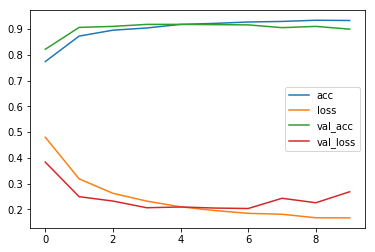

In [30]:
dfhistory = pd.DataFrame(h.history)
dfhistory.plot()


In [31]:
X_test = pad_sequences(data_test['seq'])
y_test = data_test['bad_message'].values


In [32]:
y_test_pred = model.predict_classes(X_test, batch_size=2048, verbose=1)


 2048/47872 [>.............................] - ETA: 2:25

 4096/47872 [=>............................] - ETA: 1:58

 6144/47872 [==>...........................] - ETA: 1:47

 8192/47872 [====>.........................] - ETA: 1:40

10240/47872 [=====>........................] - ETA: 1:33

12288/47872 [======>.......................] - ETA: 1:28

14336/47872 [=======>......................] - ETA: 1:23

16384/47872 [=========>....................] - ETA: 1:22

18432/47872 [==========>...................] - ETA: 1:18

20480/47872 [===========>..................] - ETA: 1:14

22528/47872 [=============>................] - ETA: 1:10

24576/47872 [==============>...............] - ETA: 1:05

26624/47872 [===============>..............] - ETA: 59s 

28672/47872 [================>.............] - ETA: 54s

30720/47872 [==================>...........] - ETA: 48s

32768/47872 [===================>..........] - ETA: 43s

34816/47872 [====================>.........] - ETA: 37s

36864/47872 [======================>.......] - ETA: 31s

38912/47872 [=======================>......] - ETA: 25s

40960/47872 [========================>.....] - ETA: 19s

43008/47872 [=========================>....] - ETA: 13s

45056/47872 [===========================>..] - ETA: 8s 

47104/47872 [============================>.] - ETA: 2s

47872/47872 [==============================] - 136s 3ms/step


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [34]:
accuracy_score(y_test, y_test_pred)


0.9356199866310161

In [35]:
confusion_matrix(y_test, y_test_pred)


array([[40598,  2406],
       [  676,  4192]], dtype=int64)

In [36]:
print(classification_report(y_test, y_test_pred))


             precision    recall  f1-score   support

      False       0.98      0.94      0.96     43004
       True       0.64      0.86      0.73      4868

avg / total       0.95      0.94      0.94     47872



In [37]:
import os
dest_dir = "./result"
model_name = "toxic_model"
model_basename = os.path.join(dest_dir, model_name)
model.save(model_basename + ".h5")
print("Saved model to disk")

Saved model to disk


In [38]:
dest_dir = "./result"
model_name = "toxic_model"
model_basename = os.path.join(dest_dir, model_name)
model_json = model.to_json()
with open(model_basename + ".json", "w") as json_file: json_file.write(model_json)
model.save_weights(model_basename + ".weights.h5")
print("Saved model to disk")

Saved model to disk
